# Exercise 2.5.1 - Handwritten Digit Recognition with CNN
### The user trains a CNN model using the MNIST dataset and evaluates its performance by testing on real handwritten digits collected from paper.


# Table of Contents
1. Set Up Environment  
2. Load and Explore MNIST Dataset  
3. Preprocess the Data  
4. Build CNN Model  
5. Compile and Train the Model  
6. Evaluate Model Performance on Test Set  
7. Test Model with Real Handwritten Digits  
8. Evaluate Predictions and Save Output  


# 1. Set Up Environment
### The user imports essential libraries to work with image data, build a CNN model, and visualize results.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


# 2. Load and Explore MNIST Dataset
### The user loads the MNIST dataset and displays a few sample digits to understand the structure and shape of the data.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


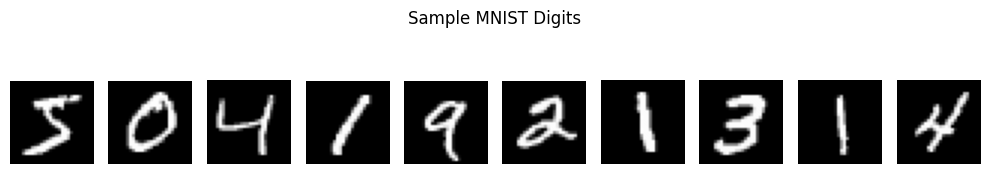

In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display shapes
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

# Plot sample digits
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.tight_layout()
plt.show()


# 3. Preprocess the Data
### The user reshapes the image data to add a channel dimension, normalizes pixel values, and one-hot encodes the target labels for training.


In [3]:
# Reshape to (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Check updated shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


# 4. Build CNN Model
### The user builds a sequential CNN model with two convolutional layers, pooling, and dense layers suitable for digit classification.


In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

# Display model summary
model.summary()


D:\software\Python\Python 3.11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

# 5. Compile and Train the Model
### The user compiles the CNN model with Adam optimizer and categorical crossentropy loss, then trains it using the training data.


In [6]:
# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=128
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8535 - loss: 0.5106 - val_accuracy: 0.9764 - val_loss: 0.0746
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9794 - loss: 0.0707 - val_accuracy: 0.9853 - val_loss: 0.0487
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9859 - loss: 0.0475 - val_accuracy: 0.9893 - val_loss: 0.0354
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9896 - loss: 0.0333 - val_accuracy: 0.9900 - val_loss: 0.0341
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9913 - loss: 0.0277 - val_accuracy: 0.9907 - val_loss: 0.0311
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9936 - loss: 0.0203 - val_accuracy: 0.9869 - val_loss: 0.0412
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9904 - val_loss: 0.0309
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9956 - loss: 0.0140 - 

# 6. Evaluate Model Performance on Test Set
### The user plots training and validation accuracy and loss curves to assess how well the CNN model has learned over time.


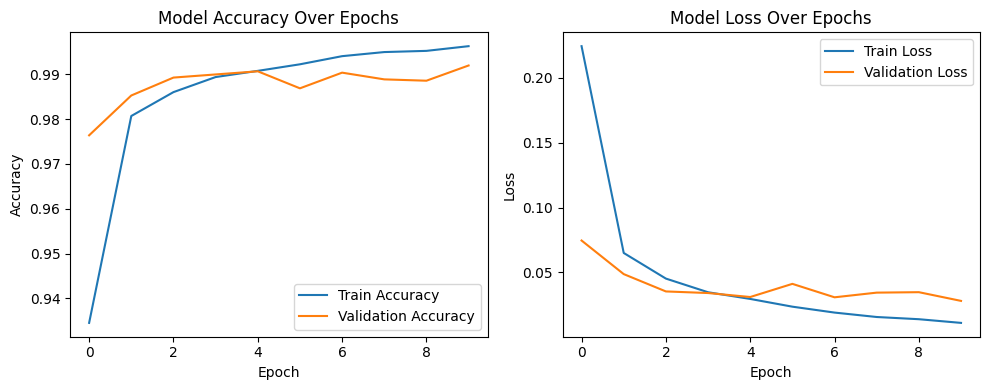

In [7]:
# Plot accuracy and loss
plt.figure(figsize=(10,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Save performance chart
plt.savefig("2.5_mnist_cnn_accuracy_loss.png")


<Figure size 640x480 with 0 Axes>

# 7. Test Model with Real Handwritten Digits
### The user installs OpenCV (if needed), processes custom handwritten digit images, and predicts them using the trained CNN model.


In [10]:
# Install OpenCV if not already installed
try:
    import cv2
except ImportError:
    !pip install opencv-python
    import cv2

import os
import numpy as np

# Function to process handwritten digit images
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)     # Load as grayscale
    img = cv2.bitwise_not(img)                           # Invert colors
    img = cv2.resize(img, (28, 28))                      # Resize to 28x28
    img = img / 255.0                                    # Normalize
    img = img.reshape(1, 28, 28, 1)                       # Reshape for CNN
    return img

# List image filenames (must match your folder)
digit_paths = [f"{i}.jpg" for i in range(10)]

# Predict and collect results
predicted_digits = []
for path in digit_paths:
    img = preprocess_image(path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    predicted_digits.append(predicted_class)

# Display predictions
for i, digit in enumerate(predicted_digits):
    print(f"Image '{i}.jpg' → Predicted: {digit}")



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 39.5/39.5 MB 11.3 MB/s eta 0:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image '0.jpg' → Predicted: 4
Image '1.jpg' → Predicted: 1
Image '2.jpg' → Predicted: 1
Image '3.jpg' → Predicted: 7
Image '4.jpg' → Predicted: 1
Image '5.jpg' → Predicted: 1
Image '6.jpg' → Predicted: 1
Image '7.jpg' → Predicted: 7
Image '8.jpg' → Predicted: 1
Image '9.jpg' → Predicted: 0


# 8. Evaluate Predictions and Save Output
### The user summarizes the model's performance on real handwritten digits and saves the results for future reference.


In [11]:
# Define true labels (based on file name)
true_labels = list(range(10))

# Compare and count correct predictions
correct = sum([pred == true for pred, true in zip(predicted_digits, true_labels)])
accuracy = correct / len(true_labels) * 100

# Print summary
print(f"\nCorrect Predictions: {correct}/10")
print(f"Accuracy on Real Handwritten Digits: {accuracy:.1f}%")



Correct Predictions: 2/10
Accuracy on Real Handwritten Digits: 20.0%
